# Exercise 02
## Time Series Analysis

Presentado por:

Diego Alejandro Diaz - 202027745
Andres Felipe Botero - 201421261
Sindy Carolina Niño - 202020034
Juliana López Botero - 202027785

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()


Se descargan los datos de google trend con el interes en la busqueda de información sobre tesla en los ultimos 5 años

In [30]:
data = pd.read_csv("C:/Users/juliana.lopez/Documents/Juli/UNIVERSIDAD/Analisis avanzado/tesla2.csv", sep=",")

In [31]:
data.head()

,Semana,interes
0,2016-07-17,18
1,2016-07-24,16
2,2016-07-31,17
3,2016-08-07,14
4,2016-08-14,14


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Semana   260 non-null    object
 1   interes  260 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.2+ KB


In [33]:
data.Semana = pd.to_datetime(data.Semana)

In [34]:
data.set_index('Semana', inplace=True)

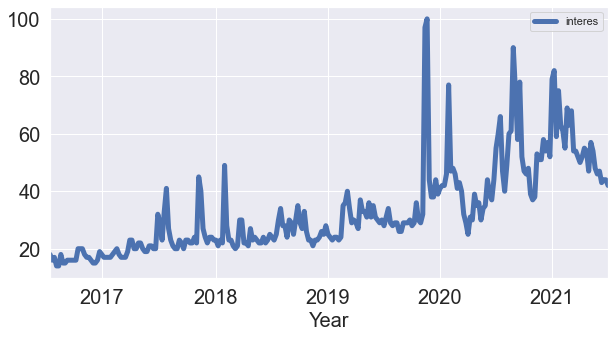

In [35]:
data.plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

De acuerdo al analisís del grafico anterior podemos concluir que la serie del 2017 al 2021 no es estacionaria, dado que a finales del 2019 empiezan a tener picos muy altos que no se presentaban en los años anteriores

## Tendencia de la Serie

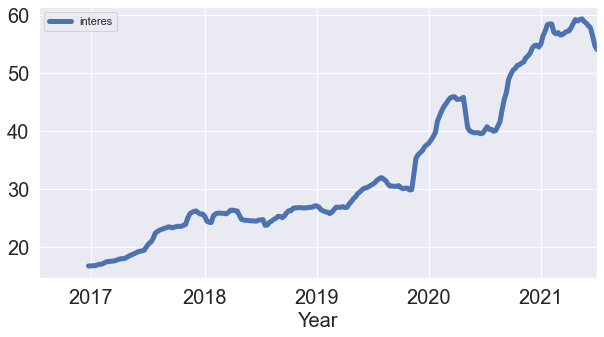

In [37]:
data.rolling(24).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

## Estacionalidad de la serie

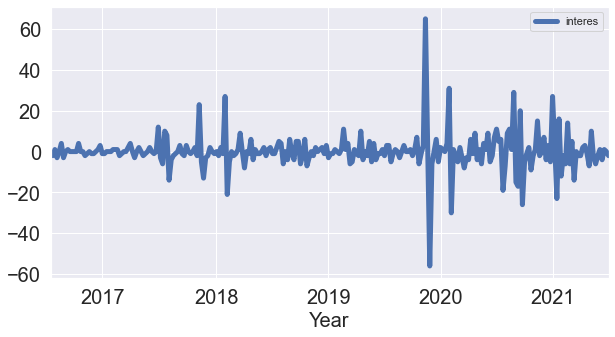

In [38]:
data.diff().plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [39]:
from statsmodels.tsa.stattools import adfuller

In [40]:
result = adfuller(data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.268879
p-value: 0.182202
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


La variable original no es estacionaria

In [41]:
result = adfuller(data.diff().iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.083467
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


Al diferenciar la serie es estacionaria

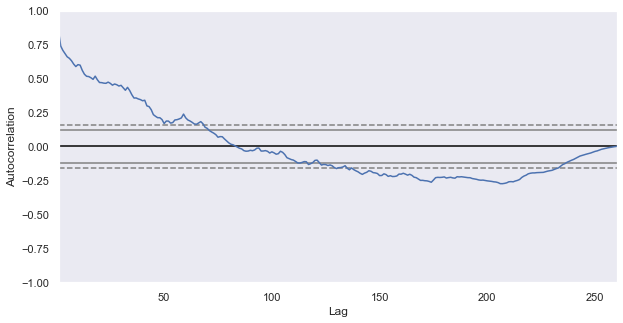

In [42]:
plt.figure(figsize=(10,5))
pd.plotting.autocorrelation_plot(data);